## Include stuff

In [1]:
from nuclei_dataset import nuclei_dataset
from torch.utils.data import DataLoader
from util.logconf import logging
from collections import namedtuple
from model_unet_original import UNet
from augmentation_model import augmentation_model
from nuclei_training import nuclei_training_app


### Train nuclei_combined = false

In [ ]:
model_params = namedtuple(
    'model_params',
    'epochs, batch_size, valid_step, lr, use_gpu',
)

dataset_params = namedtuple(
    'dataset_params',
    'train_path, validation_path, mask, size, n_workers',
)

augmentation_params = namedtuple(
    'augmentation_params',
    'flip, rotate, noise',
)

# Training parameters
data_info = dataset_params('/home/franko/Desktop/Nuclei/data-science-bowl-2018/train/*',
                   '/home/franko/Desktop/Nuclei/data-science-bowl-2018/valid/*',
                   False, 64, 8)
# Model parameters
model_info = model_params(15, 32, 1, 0.0001, True)

# Aug parameters
aug_info = augmentation_params(True, True, 0.25)

# Init
training = nuclei_training_app(data_info, model_info, aug_info)

# Go :)
training.main()

### Train nuclei_combined = True

In [ ]:
model_params = namedtuple(
    'model_params',
    'epochs, batch_size, valid_step, lr, use_gpu',
)

dataset_params = namedtuple(
    'dataset_params',
    'train_path, validation_path, mask, size, n_workers',
)

augmentation_params = namedtuple(
    'augmentation_params',
    'flip, rotate, noise',
)

# Training parameters
data_info = dataset_params('/home/franko/Desktop/Nuclei/data-science-bowl-2018/train/*',
                   '/home/franko/Desktop/Nuclei/data-science-bowl-2018/valid/*',
                   True, 128, 2)
# Model parameters
model_info = model_params(50, 16, 2, 0.0001, True)

# Aug parameters
aug_info = augmentation_params(True, True, 0.25)

# Init
training = nuclei_training_app(data_info, model_info, aug_info)

# Go :)
training.main()

### Evaluate models

2022-02-18 13:14:39,868 INFO     pid:96478 nuclei_training:108:init_models Using cuda: NVIDIA GeForce RTX 2070 with Max-Q Design
2022-02-18 13:14:39,895 INFO     pid:96478 nuclei_training:325:load_model LOADING MODEL
2022-02-18 13:14:40,068 INFO     pid:96478 nuclei_training:332:load_model LOADING MODEL, epoch 2, time 2022-02-18 11:36:24.647423
2022-02-18 13:14:40,069 INFO     pid:96478 nuclei_dataset:258:__init__ <nuclei_dataset.nuclei_dataset object at 0x7f3c806a6390>: Instance mode activated: /home/franko/Desktop/Nuclei/data-science-bowl-2018/train/3bfa8b3b01fd24a28477f103063d17368a7398b27331e020f3a0ef59bf68c940/images/3bfa8b3b01fd24a28477f103063d17368a7398b27331e020f3a0ef59bf68c940.png
2022-02-18 13:14:40,070 INFO     pid:96478 nuclei_dataset:266:__init__ <nuclei_dataset.nuclei_dataset object at 0x7f3c806a6390>: Mask mode, nuclei combined: True
2022-02-18 13:14:40,070 INFO     pid:96478 nuclei_dataset:267:__init__ <nuclei_dataset.nuclei_dataset object at 0x7f3c806a6390>: 1 samples


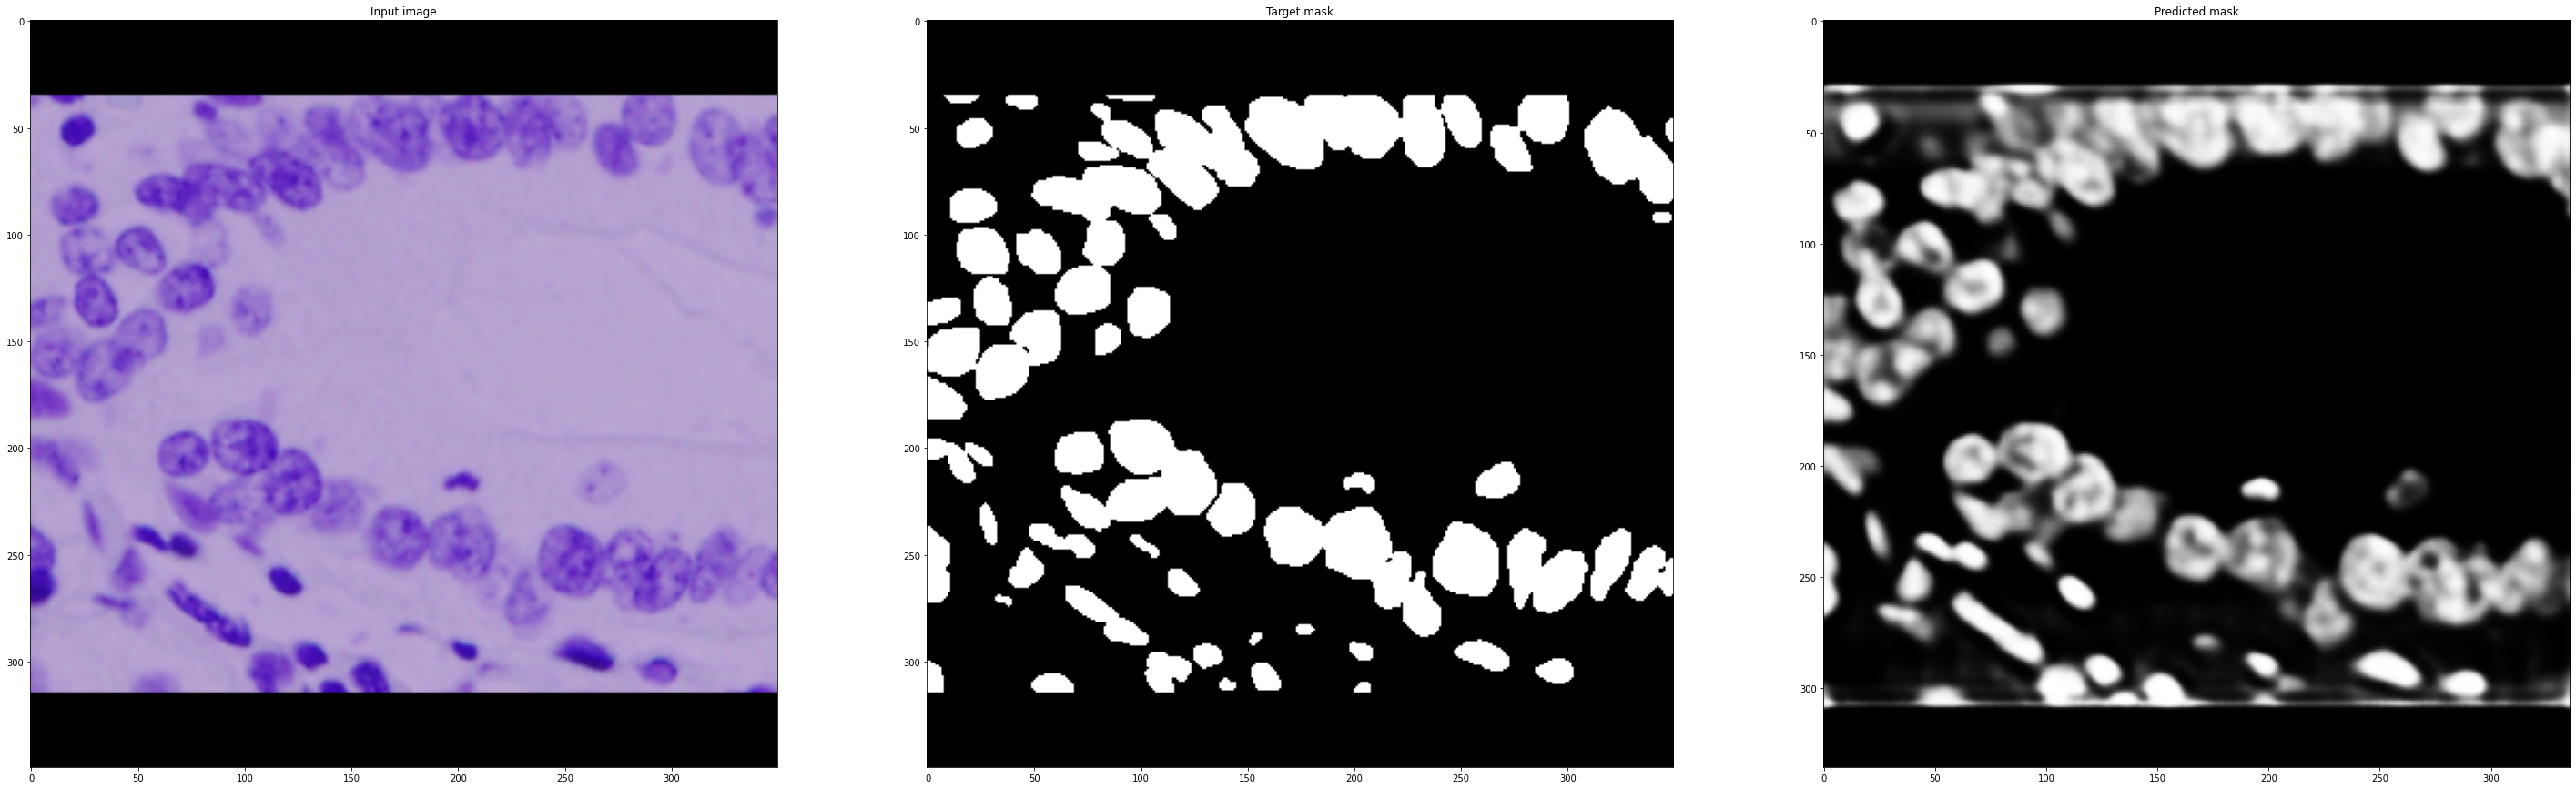

In [9]:
# Training parameters
model_params = namedtuple(
    'model_params',
    'epochs, batch_size, valid_step, lr, use_gpu',
)

dataset_params = namedtuple(
    'dataset_params',
    'train_path, validation_path, mask, size, n_workers',
)

augmentation_params = namedtuple(
    'augmentation_params',
    'flip, rotate, noise',
)

data_info = dataset_params('/home/franko/Desktop/Nuclei/data-science-bowl-2018/train/*',
                   '/home/franko/Desktop/Nuclei/data-science-bowl-2018/valid/*',
                   True, 350, 0)

model_info = model_params(50, 16, 2, 0.0001, True)

#aug_info = augmentation_params(True, True, 25.0)
aug_info = augmentation_params(False, False, False)

training = nuclei_training_app(data_info, model_info, aug_info)
training.load_model('/home/franko/Desktop/Nuclei/Scripts/best_model-false.pth')
#training.eval_model('/home/franko/Desktop/Nuclei/data-science-bowl-2018/train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/images/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1.png')
training.eval_model('/home/franko/Desktop/Nuclei/data-science-bowl-2018/train/3bfa8b3b01fd24a28477f103063d17368a7398b27331e020f3a0ef59bf68c940/images/3bfa8b3b01fd24a28477f103063d17368a7398b27331e020f3a0ef59bf68c940.png')


### Display dataset

In [25]:
import matplotlib.pyplot as plt
import torch 
import numpy as np

def plot_sample(sample):
    imgs, masks, info = sample
    imgs = imgs[30]
    masks = masks[30]
    print(info.studyId[30], info.cx[30], info.cy[30])
    arr = imgs.numpy()
    plt.figure()
    #subplot(r,c) provide the no. of rows and columns
    f, axarr = plt.subplots(1,2) 

    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[0].imshow(imgs.permute(1,2,0))
    axarr[1].imshow(masks.permute(1,2,0), cmap='gray')
    plt.show()

2022-02-18 13:18:47,596 INFO     pid:96478 nuclei_dataset:058:get_nuclei_info Searching for samples..., this can take a while.
2022-02-18 13:19:40,014 INFO     pid:96478 nuclei_dataset:266:__init__ <nuclei_dataset.nuclei_dataset object at 0x7f3c800d6a50>: Mask mode, nuclei combined: False
2022-02-18 13:19:40,014 INFO     pid:96478 nuclei_dataset:267:__init__ <nuclei_dataset.nuclei_dataset object at 0x7f3c800d6a50>: 26659 samples


/home/franko/Desktop/Nuclei/data-science-bowl-2018/train/442c4eb0185698fe7d148c108a46f74abd399aecda2f4f22981a1671cd95dd7d/images/442c4eb0185698fe7d148c108a46f74abd399aecda2f4f22981a1671cd95dd7d.png tensor(307.5306, dtype=torch.float64) tensor(71.1242, dtype=torch.float64)


<Figure size 432x288 with 0 Axes>

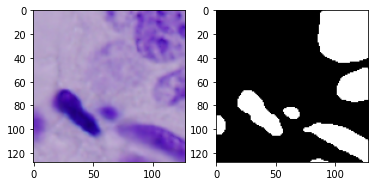

In [27]:
_train_ds = nuclei_dataset('/home/franko/Desktop/Nuclei/data-science-bowl-2018/train/*',
            nuclei_combined = False,
            patch_size = 128)
_train_dl = DataLoader(
            _train_ds,
            batch_size=32,
            num_workers=4,
            pin_memory=False,
)
augmentation_params = namedtuple(
    'augmentation_params',
    'flip, rotate, noise',
)


from augmentation_model import augmentation_model

aug_info = augmentation_params(True, True, 0.25)
_aug_model = augmentation_model(aug_info)

for batch in _train_dl:
    img, mask, info = batch
    img, mask = _aug_model(img,mask)
    plot_sample(batch)
    break